# Analyse style mentions in dataset

total mentions 323448
           style  mentions    percent
0    Digital art     91552  28.305013
1        Realism     64820  20.040316
2   Hyperrealism     17662   5.460538
3    Art Nouveau     13541   4.186453
4        Baroque     12362   3.821944
5   Photorealism     10659   3.295429
6     Surrealism     10471   3.237306
7    Renaissance      9697   2.998009
8       Art Deco      7128   2.203755
9       Futurism      6884   2.128317
10      Graffiti      6524   2.017017
11      Fine Art      6078   1.879127
12        Rococo      5524   1.707848
13        Op Art      4203   1.299436
14   Romanticism      3901   1.206067
top 15 styles: ['Digital art' 'Realism' 'Hyperrealism' 'Art Nouveau' 'Baroque'
 'Photorealism' 'Surrealism' 'Renaissance' 'Art Deco' 'Futurism'
 'Graffiti' 'Fine Art' 'Rococo' 'Op Art' 'Romanticism']


/tmp/ipykernel_1013231/2319241490.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( names , rotation=90)


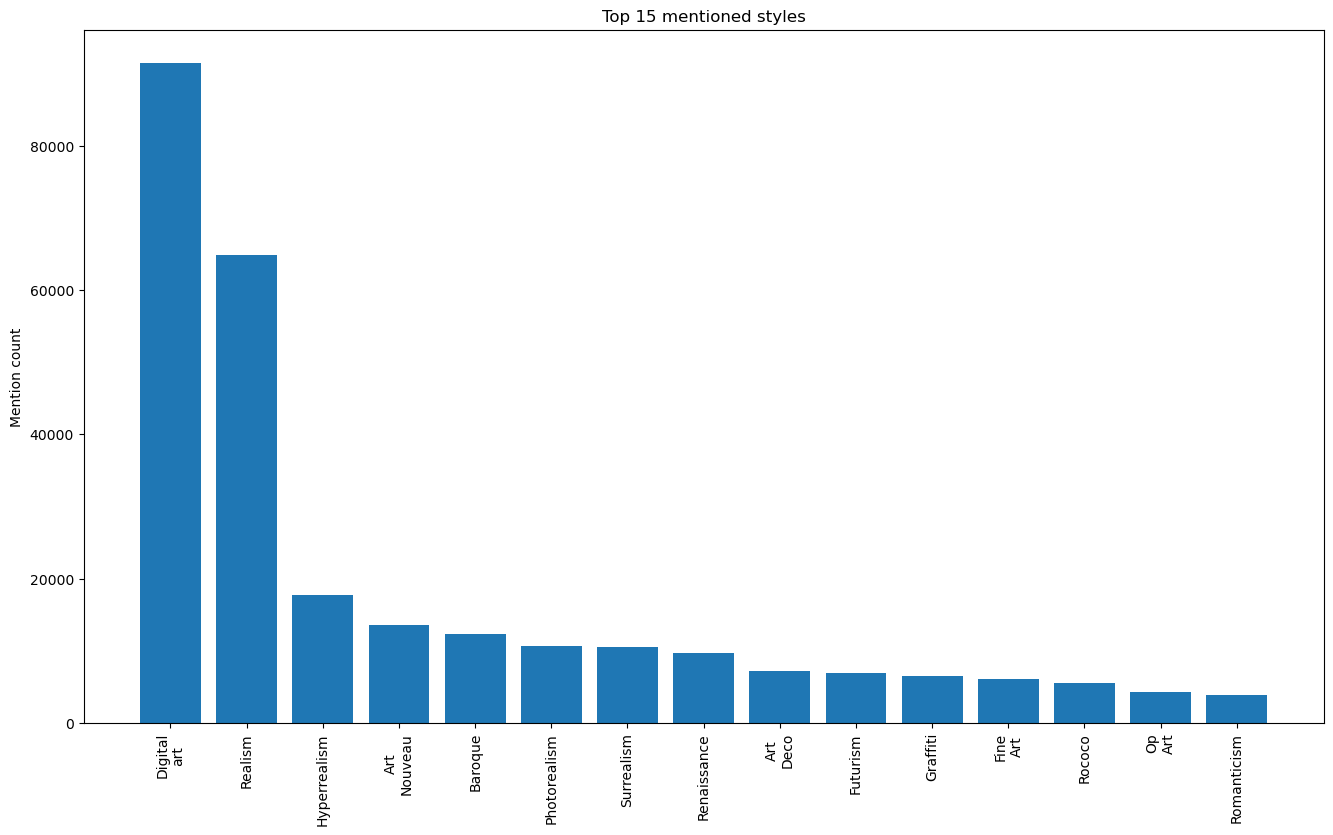

/tmp/ipykernel_1013231/2319241490.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( names , rotation=90)


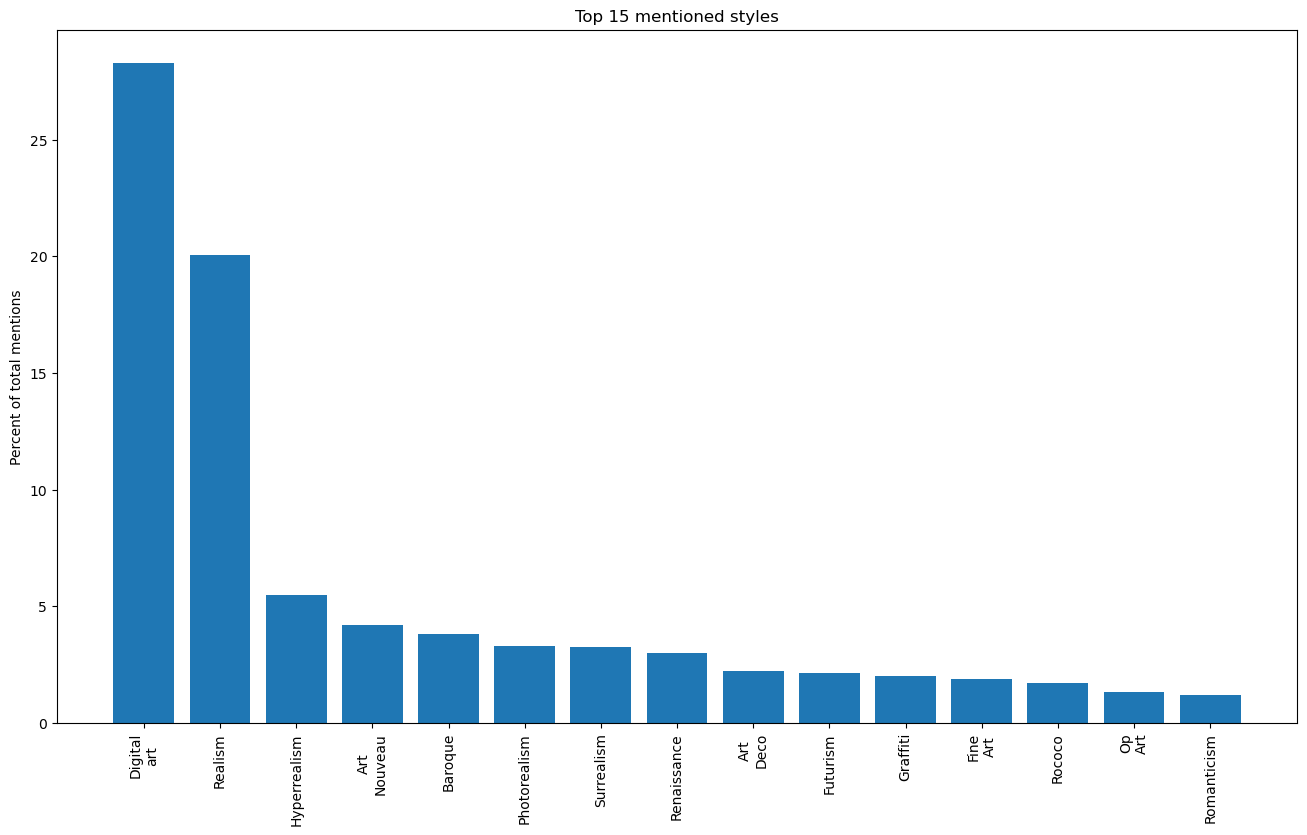

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

top = 15


style_mentions = pd.read_parquet('../results/style_mentions.parquet', engine='pyarrow')
style_mentions.sort_values("mentions", axis=0, ascending=False, inplace=True)


mentions_sum = style_mentions["mentions"].sum(axis=0)
print(f'total mentions {mentions_sum}')
assert mentions_sum > 0, f'something is completely wrong, check the style_mentions file'

style_mentions["percent"] = style_mentions["mentions"] / mentions_sum * 100


print(style_mentions.head(top))
print(f'top {top} styles: {style_mentions.head(top)["style"].values}')


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x.replace(" ", "\n") for x in style_mentions["style"].iloc[0:top]]
values = [x for x in style_mentions["mentions"].iloc[0:top]]
ax.bar(names,values)
ax.set_ylabel('Mention count')
ax.set_title(f'Top {top} mentioned styles')
if top > 10:
    ax.set_xticklabels( names , rotation=90)
plt.savefig(f'../images/top{top}_styles_counts.png')
plt.show()


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x.replace(" ", "\n") for x in style_mentions["style"].iloc[0:top]]
values = [x for x in style_mentions["percent"].iloc[0:top]]
ax.bar(names,values)
ax.set_ylabel('Percent of total mentions')
ax.set_title(f'Top {top} mentioned styles')
if top > 10:
    ax.set_xticklabels( names , rotation=90)
plt.savefig(f'../images/top{top}_styles_percentages.png')
plt.show()

total mentions 323448


/tmp/ipykernel_2334385/1584786197.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( names , rotation=90)


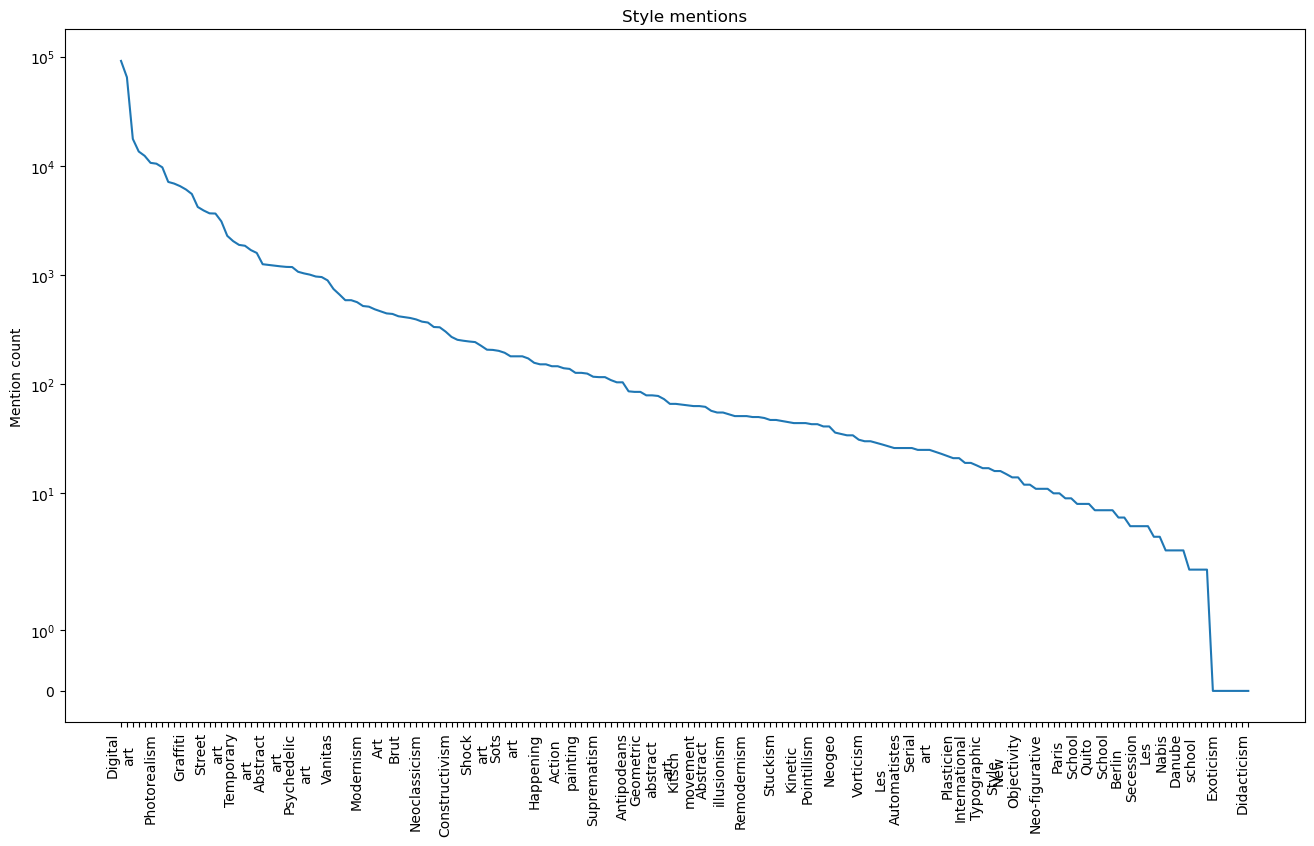

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


style_mentions = pd.read_parquet('../results/style_mentions.parquet', engine='pyarrow')
style_mentions.sort_values("mentions", axis=0, ascending=False, inplace=True)


mentions_sum = style_mentions["mentions"].sum(axis=0)
print(f'total mentions {mentions_sum}')
assert mentions_sum > 0, f'something is completely wrong, check the style_mentions file'
scale = "symlog" # "linear", "log", "symlog"


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x.replace(" ", "\n") for x in style_mentions["style"]]
values = [x for x in style_mentions["mentions"]]
ax.plot(names,values)
ax.set_ylabel('Mention count')
ax.set_title(f'Style mentions')
plt.yscale(scale)
ax.set_xticklabels( names , rotation=90)
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


plt.savefig(f'../images/styles_count_distribution_scale_{scale}.png')
plt.show()

# Analysing distributions of num_artist and num_styles

amount of prompts with no artists 993659 (54.60240860574302%)
amount of prompts with oneplus artists 826149 (45.39759139425698%)
amount of prompts with no style 1576468 (86.62825968453815%)
amount of prompts with oneplus style 243340 (13.37174031546185%)
amount of prompts with no artists and no style 901421 (49.53385192284021%)
amount of prompts with more than one artists and no style 675047 (37.09440776169794%)
amount of prompts with more than one artists and more than one style 151102 (8.303183632559039%)


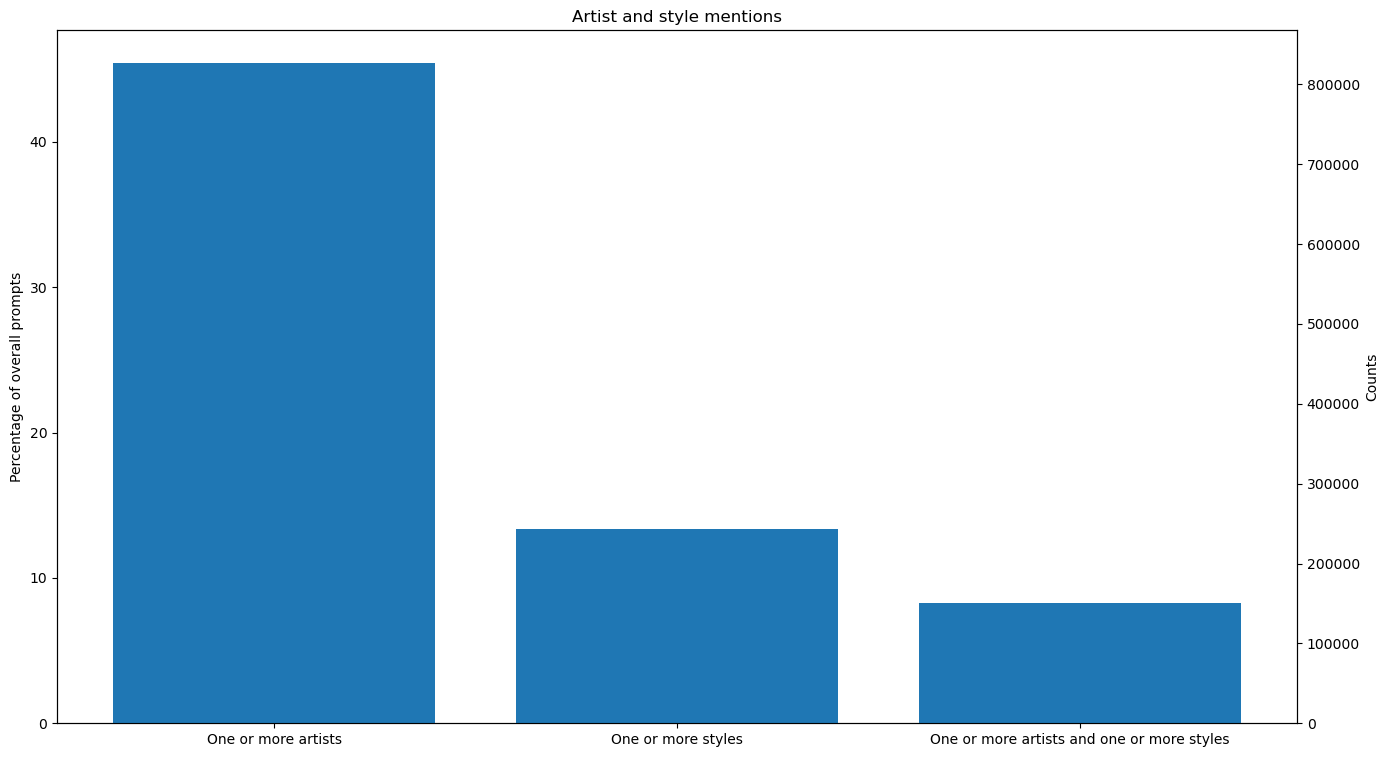


             num_artists  num_styles
num_artists     1.000000    0.107718
num_styles      0.107718    1.000000


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


exact_matches = pd.read_parquet('../results/artists_exact_match_large.parquet', engine='pyarrow')

no_artist=exact_matches[exact_matches.num_artists==0]
print(f'amount of prompts with no artists {no_artist.shape[0]} ({no_artist.shape[0]/exact_matches.shape[0] * 100}%)')

oneplus_artist=exact_matches[exact_matches.num_artists>0]
print(f'amount of prompts with oneplus artists {oneplus_artist.shape[0]} ({oneplus_artist.shape[0]/exact_matches.shape[0] * 100}%)')

no_style=exact_matches[exact_matches.num_styles == 0]
print(f'amount of prompts with no style {no_style.shape[0]} ({no_style.shape[0]/exact_matches.shape[0] * 100}%)')

oneplus_style=exact_matches[exact_matches.num_styles > 0]
print(f'amount of prompts with oneplus style {oneplus_style.shape[0]} ({oneplus_style.shape[0]/exact_matches.shape[0] * 100}%)')

no_artist_no_style=exact_matches[(exact_matches.num_artists==0) & (exact_matches.num_styles == 0)]
print(f'amount of prompts with no artists and no style {no_artist_no_style.shape[0]} ({no_artist_no_style.shape[0]/exact_matches.shape[0] * 100}%)')

oneplus_artist_no_style=exact_matches[(exact_matches.num_artists>0) & (exact_matches.num_styles == 0)]
print(f'amount of prompts with more than one artists and no style {oneplus_artist_no_style.shape[0]} ({oneplus_artist_no_style.shape[0]/exact_matches.shape[0] * 100}%)')

oneplus_artist_oneplus_style=exact_matches[(exact_matches.num_artists>0) & (exact_matches.num_styles > 0)]
print(f'amount of prompts with more than one artists and more than one style {oneplus_artist_oneplus_style.shape[0]} ({oneplus_artist_oneplus_style.shape[0]/exact_matches.shape[0] * 100}%)')

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
ax2 = ax.twinx()
names = ["One or more artists", "One or more styles", "One or more artists and one or more styles"]
percentages = [ oneplus_artist.shape[0]/exact_matches.shape[0] * 100, oneplus_style.shape[0]/exact_matches.shape[0] * 100, oneplus_artist_oneplus_style.shape[0]/exact_matches.shape[0] * 100]
counts = [ oneplus_artist.shape[0], oneplus_style.shape[0], oneplus_artist_oneplus_style.shape[0]]
ax.bar(names,percentages)
ax2.bar(names,counts)
ax.set_ylabel('Percentage of overall prompts')
ax2.set_ylabel('Counts')
ax.set_title(f'Artist and style mentions')

plt.savefig(f'../images/artist_and_style_mentions.png')
plt.show()

print()

print(exact_matches[["num_artists", "num_styles"]].corr())